<a href="https://colab.research.google.com/github/TriPhan15/Graph-coloring/blob/main/B%C3%A0i_To%C3%A1n_T%C3%B4_M%C3%A0u___Tr%C3%ADPhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# TẠO FILE DỮ LIỆU INPUT.TXT
matrix = """0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0"""

with open("input.txt", "w") as f: # mở file với chế độ write ghi ghi đè
    f.write(matrix)

print("Đã tạo file input.txt thành công!")

Đã tạo file input.txt thành công!


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Hàm đọc file
def read_matrix(filename):
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                row = [int(x) for x in line.strip().split()]
                if row:
                    matrix.append(row)
        return matrix
    except FileNotFoundError:
        return None

# 2. Thuật toán tô màu - giảm bậc chi tiết
def graph_coloring_algorithm(matrix):
    num_nodes = len(matrix)
    nodes = [chr(65 + i) for i in range(num_nodes)] # A, B, C...

    available_colors = ["Red", "Blue", "Green", "Yellow", "Orange", "Purple", "Pink", "Cyan"]

    # Tính bậc ban đầu
    current_degrees = {}
    for i in range(num_nodes):
        current_degrees[nodes[i]] = sum(matrix[i])

    domain = {node: list(available_colors) for node in nodes}
    solution = {}
    uncolored_nodes = list(nodes)

    print(f"[*] Bậc ban đầu của các đỉnh: {current_degrees}\n")

    step_count = 1

    # --- VÒNG LẶP CHÍNH ---
    while uncolored_nodes:
        print(f"--- VÒNG LẶP THỨ {step_count} ---")

        # 1. Tìm đỉnh có bậc lớn nhất trong các đỉnh chưa tô
        # (Nếu bằng nhau thì lấy theo thứ tự chữ cái để ổn định)
        u = max(uncolored_nodes, key=lambda node: (current_degrees[node], -ord(node)))
        degree_u = current_degrees[u]

        print(f"1. Chọn đỉnh: {u} (Vì có bậc cao nhất hiện tại là: {degree_u})")

        # 2. Tô màu
        if not domain[u]:
            print(f"   LỖI: Không còn màu khả dụng cho đỉnh {u}!")
            return None, None

        color_assigned = domain[u][0]
        solution[u] = color_assigned
        print(f"2. Tô màu cho {u}: {color_assigned}")

        # 3. Xử lý giảm bậc
        print(f"3. Xử lý giảm bậc:")
        uncolored_nodes.remove(u) # Loại u khỏi danh sách xét duyệt
        current_degrees[u] = 0    # Đặt bậc u về 0
        print(f"   - Đỉnh {u} đã tô xong -> Bậc về 0.")

        u_idx = nodes.index(u)

        # Duyệt qua các hàng xóm để giảm bậc
        neighbors_updated = False
        for v_idx, is_connected in enumerate(matrix[u_idx]):
            if is_connected == 1:
                v_name = nodes[v_idx]

                # Chỉ giảm bậc những đỉnh CHƯA được tô
                if v_name in uncolored_nodes:
                    old_degree = current_degrees[v_name]
                    current_degrees[v_name] -= 1 # GIẢM BẬC

                    # In ra chi tiết sự thay đổi
                    print(f"   - Đỉnh kề {v_name}: Bậc giảm từ {old_degree} xuống {current_degrees[v_name]}")
                    neighbors_updated = True

                    # Cập nhật miền giá trị màu (Ràng buộc)
                    if color_assigned in domain[v_name]:
                        domain[v_name].remove(color_assigned)

        if not neighbors_updated:
            print(f"   - (Không có đỉnh kề nào cần giảm bậc)")

        # 4. Hiển thị trạng thái để chuẩn bị cho vòng lặp sau
        remaining_degrees = {n: current_degrees[n] for n in uncolored_nodes}
        print(f"4. Danh sách bậc các đỉnh chưa tô còn lại: {remaining_degrees}")
        print("-" * 40 + "\n")

        step_count += 1

    return solution, nodes

# 3. Hàm vẽ đồ thị
def draw_graph(matrix, solution, nodes):
    G = nx.Graph()
    for i in range(len(matrix)):
        G.add_node(nodes[i])
        for j in range(i + 1, len(matrix)):
            if matrix[i][j] == 1:
                G.add_edge(nodes[i], nodes[j])

    colors = [solution[node] for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=colors,
            node_size=2000, font_color="white", font_weight="bold", edge_color="gray")
    plt.title("Minh họa Thuật toán Tô màu Đồ thị")
    plt.show()

--- Đang đọc file input.txt ---
Ma trận kề đã đọc:
[0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0]

--- KẾT QUẢ TÔ MÀU ---
[*] Bậc ban đầu của các đỉnh: {'A': 3, 'B': 4, 'C': 4, 'D': 3, 'E': 3, 'F': 3}

--- VÒNG LẶP THỨ 1 ---
1. Chọn đỉnh: B (Vì có bậc cao nhất hiện tại là: 4)
2. Tô màu cho B: Red
3. Xử lý giảm bậc:
   - Đỉnh B đã tô xong -> Bậc về 0.
   - Đỉnh kề A: Bậc giảm từ 3 xuống 2
   - Đỉnh kề C: Bậc giảm từ 4 xuống 3
   - Đỉnh kề D: Bậc giảm từ 3 xuống 2
   - Đỉnh kề F: Bậc giảm từ 3 xuống 2
4. Danh sách bậc các đỉnh chưa tô còn lại: {'A': 2, 'C': 3, 'D': 2, 'E': 3, 'F': 2}
----------------------------------------

--- VÒNG LẶP THỨ 2 ---
1. Chọn đỉnh: C (Vì có bậc cao nhất hiện tại là: 3)
2. Tô màu cho C: Blue
3. Xử lý giảm bậc:
   - Đỉnh C đã tô xong -> Bậc về 0.
   - Đỉnh kề A: Bậc giảm từ 2 xuống 1
   - Đỉnh kề D: Bậc giảm từ 2 xuống 1
   - Đỉnh kề E: Bậc giảm từ 3 xuống 2
4. Danh sách bậc các đỉnh chưa tô cò

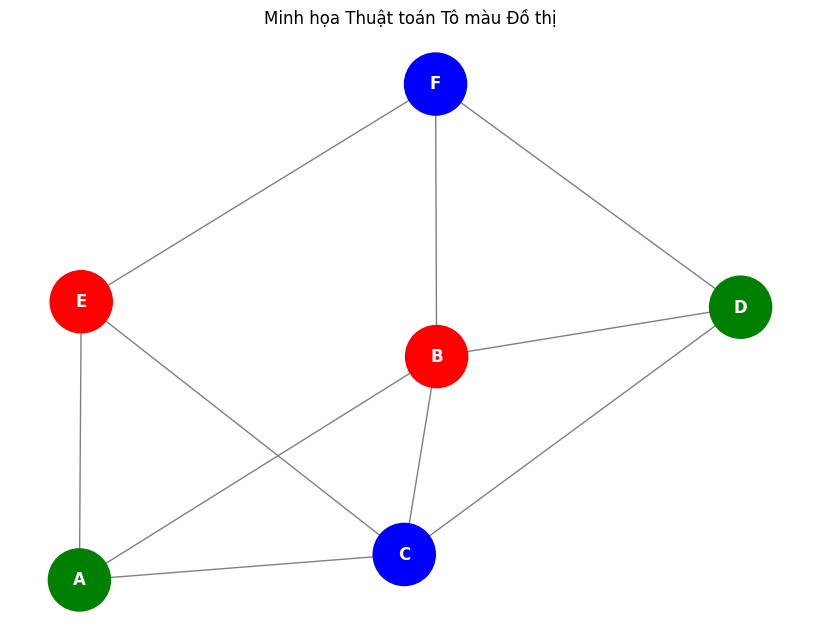

In [13]:
# --- Ô 3: CHẠY CHƯƠNG TRÌNH ---
input_file = "input.txt"

print(f"--- Đang đọc file {input_file} ---")
adjacency_matrix = read_matrix(input_file)

if adjacency_matrix:
    print("Ma trận kề đã đọc:")
    for row in adjacency_matrix:
        print(row)

    print("\n--- KẾT QUẢ TÔ MÀU ---")
    result, node_names = graph_coloring_algorithm(adjacency_matrix)

    if result:
        for node, color in sorted(result.items()):
            print(f"Đỉnh {node}: {color}")

        # Vẽ hình
        draw_graph(adjacency_matrix, result, node_names)
    else:
        print("Không tìm thấy lời giải.")
else:
    print("Lỗi đọc file.")